In [1]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_data = pd.read_csv('date_data.csv')
model_data.head()

,income,attractive,assets,edueduclass,Dated,income_rank,attractive_rank,assets_rank
0,3000,9.0,5.145476,1,0,0,0,0
1,3000,14.5,40.643781,4,1,0,0,1
2,3000,6.0,5.145476,1,0,0,0,0
3,3000,1.0,7.067434,1,0,0,0,0
4,3500,14.5,3.728400,2,0,0,0,0


从这份数据来看，要预测的是相亲成功率，就应该是Dated这一列，1表示成功，0表示失败，以dated作为Y值

In [3]:
y = model_data['Dated']
X = model_data.loc[:, 'income':'assets']

train_data, test_data, train_target, test_target = \
train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# 建立模型
logistic_model = linear_model.LogisticRegression()

# 训练模型
logistic_model.fit(train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
#     linear_model.LogisticRegression?

In [6]:
# 预测，返回结果是0或者1
test_est = logistic_model.predict(test_data)
train_est = logistic_model.predict(train_data)

# 预测，返回结果是概率值，即为0的概率值，为1的概率值
# 第0 列表示为0 的概率，第1列表是为1 的概率
test_est_p = logistic_model.predict_proba(test_data)[:,1]
train_est_p = logistic_model.predict_proba(train_data)[:,1]

### 模型评估

可以分为决策类（0，1）和排序类（阀值排序）

决策类可以参考accuracy或者recall分值

In [7]:
print(metrics.classification_report(test_target, test_est))

             precision    recall  f1-score   support

          0       0.89      0.73      0.80        11
          1       0.73      0.89      0.80         9

avg / total       0.82      0.80      0.80        20



In [8]:
# 查看正确率
metrics.accuracy_score(test_target, test_est)

0.8

排序类使用ROC曲线

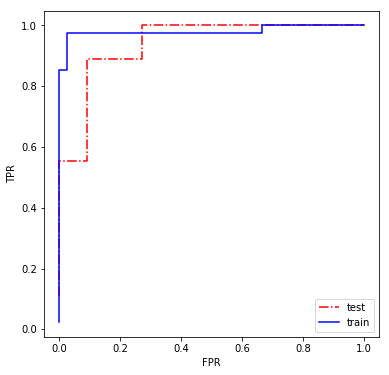

In [13]:
fpr_test, tpr_test, th_test = metrics.roc_curve(test_target, test_est_p)
fpr_train, tpr_train, th_train = metrics.roc_curve(train_target, train_est_p)
plt.figure(figsize=[6, 6])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test, tpr_test, 'r-.', label='test')
plt.plot(fpr_train, tpr_train, 'b', label='train')
plt.legend()
plt.show()

In [14]:
# 查看曲线下面积
test_AUC = metrics.roc_auc_score(test_target, test_est_p)
train_AUC = metrics.roc_auc_score(train_target, train_est_p)
print('test_AUC:', test_AUC, 'train_AUC:', train_AUC)

test_AUC: 0.9393939393939394 train_AUC: 0.9806128830519074
